# Aufgabenblatt 4

In [6]:
import pandas as pd                 # Daten laden, manipulieren, gruppieren
import numpy as np                  # falls wir später numerisch rechnen müssen
import matplotlib.pyplot as plt     # Basis für alle Plots
import seaborn as sns               # macht Boxplots, etc. deutlich schöner
import warnings
warnings.filterwarnings("ignore")   # nervige Deprecation-Warnungen weg

#CSV einlesen
df = pd.read_csv("TravelInsurancePrediction.csv").iloc[:, 1:]

## Aufgabe 1 a)

| Spalte                | Bedeutung                                          | Datentyp    | Deine Einschätzung der Relevanz              |
|-----------------------|----------------------------------------------------|-------------|-----------------------------------------------|
| Age                   | Alter (alle zwischen 25 und 35)                    | kardinal    | schwach / fast irrelevant                     |
| Employment Type       | Government Sector oder Private Self-employed       | nominal     | **stark relevant**                            |
| GraduateOrNot         | Hochschulabschluss ja/nein                         | nominal     | irrelevant                                    |
| AnnualIncome          | Jahreseinkommen in indischen Rupien               | kardinal    | **wichtigster Prädiktor!**                    |
| FamilyMembers         | Anzahl Familienmitglieder                          | kardinal    | schwach                                       |
| ChronicDiseases       | Chronische Krankheiten vorhanden (0/1)             | binär       | praktisch kein Einfluss                       |
| FrequentFlyer         | Häufig in den letzten Jahren geflogen?             | nominal     | **stark relevant**                            |
| EverTravelledAbroad   | War schon mal im Ausland?                          | nominal     | **extrem stark**                              |
| TravelInsurance       | **Zielvariable** – hat eine Reiseversicherung?    | binär (0/1) | –                                             |


Nur **vier Merkmale** scheinen wirklich wichtig zu sein:
**AnnualIncome, EverTravelledAbroad, FrequentFlyer, Employment Type**

## (b) Relevanz der Merkmale für mögliche Fragestellungen

Bei der Fragestellung „Welche Kundenmerkmale sagen den Kauf einer Reiseversicherung am besten vorher?“ bewerten wir die Relevanz der vorhandenen Merkmale wie folgt:

| Merkmal                | Erwartete Relevanz   | Begründung |
|------------------------|----------------------|----------|
| **Age**                | gering               | Die Altersspanne ist sehr eng (25–35 Jahre) und weist kaum Varianz auf → geringe Unterscheidungskraft erwartet. |
| **Employment Type**    | mittel bis hoch      | Beschäftigte im Private Sector/Self Employed haben tendenziell höheres Einkommen und häufigeres Reiseverhalten → relevanter Unterschied wahrscheinlich. |
| **GraduateOrNot**      | gering               | Ein Hochschulabschluss hat in der Regel keinen direkten Einfluss auf die Entscheidung für eine Reiseversicherung. |
| **AnnualIncome**       | sehr hoch            | Höheres Einkommen korreliert typischerweise mit mehr Auslandsreisen und höherem Risikobewusstsein → stärkster numerischer Prädiktor erwartet. |
| **FamilyMembers**      | gering bis mittel    | Größere Familien könnten häufiger oder vorsichtiger reisen → schwacher bis moderater Einfluss möglich. |
| **ChronicDiseases**    | gering               | Chronische Erkrankungen betreffen primär die Krankenversicherung; für Reiseversicherungen ist der Effekt meist vernachlässigbar. |
| **FrequentFlyer**      | hoch                 | Vielflieger haben ein deutlich höheres Reiseaufkommen → klarer Zusammenhang mit Versicherungskauf erwartet. |
| **EverTravelledAbroad**| sehr hoch            | Personen mit Auslandserfahrung sind risikobewusster und reisen öfter ins Ausland → stärkster kategorischer Prädiktor erwartet. |

**Fazit:** Die relevantesten Merkmale für die Vorhersage des Reiseversicherungskaufs sind **EverTravelledAbroad**, **FrequentFlyer**, **AnnualIncome** und (in geringerem Maße) **Employment Type**. Die übrigen Merkmale (insbesondere **Age**, **GraduateOrNot** und **ChronicDiseases**) werden als wenig unterscheidungskräftig eingestuft.

## Aufgabe 2

## a) Basierend auf der Bestimmung der Skalenniveaus, welche Korrelationskoeffizienten möchten Sie anwenden?

| Skalenniveau der Merkmale                          | Betroffene Merkmale im Datensatz                                                                 | Gewählter Korrelationskoeffizient                            | Begründung                                                                 |
|----------------------------------------------------|--------------------------------------------------------------------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Nominal**                                        | Employment Type (3 Kategorien), GraduateOrNot, ChronicDiseases, FrequentFlyer, EverTravelledAbroad (alle binär oder nominal) | **Chi²-Unabhängigkeitstest** + **Cramérs V**                  | Einzig zulässiges und etabliertes Verfahren für nominale Merkmale; Cramérs V misst die Stärke der Assoziation (0 = keine, 1 = perfekte Abhängigkeit) |
| **Ordinal**                                        | (keine echten ordinalen Merkmale im Datensatz vorhanden)                                        | — (würde Spearman oder Kendall’s τ sein)                      | —                                                                           |
| **Kardinal (metrisch)**                            | Age, AnnualIncome, FamilyMembers                                                                 | **Bravais-Pearson-Korrelation** + **Spearman-Rangkorrelation** | Pearson prüft linearen Zusammenhang (Annahme Normalverteilung); Spearman als robuste, parameterfreie Alternative bei möglichen Verletzungen der Annahmen |

**Zusammenfassung der angewandten Korrelationsmethodik:**

- **Nominale Merkmale** → Chi²-Test + Cramérs V
- **Kardinale (metrische) Merkmale** → Bravais-Pearson + Spearman (für Robustheit)
- **Ordinale Merkmale** → keine vorhanden (wären Spearman/Kendall’s τ)

Korrelationskoeffizienten der numerischen Merkmale mit TravelInsurance


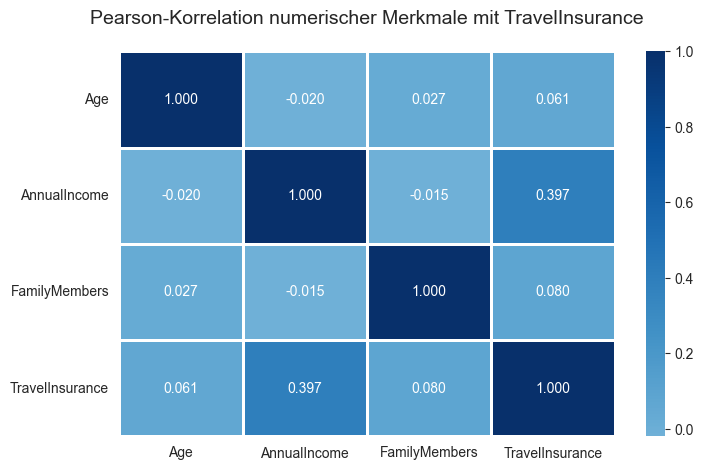


Assoziationsstärke kategorischer Merkmale (Cramérs V)


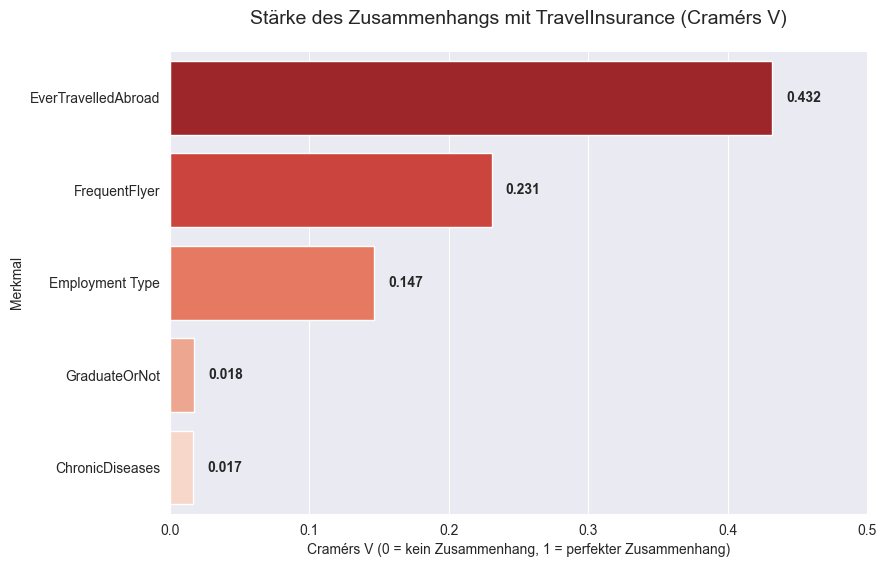


Kontingenztabellen der drei stärksten Prädiktoren:

EverTravelledAbroad × TravelInsurance



FrequentFlyer × TravelInsurance



Employment Type × TravelInsurance


In [11]:
from scipy.stats import chi2_contingency

target = "TravelInsurance"

# -------------------------------
# Numerische Merkmale: Pearson + Spearman
# -------------------------------
numeric_cols = ["Age", "AnnualIncome", "FamilyMembers"]

corr_pearson = df[numeric_cols + [target]].corr(method="pearson")[[target]].drop(target)
corr_spearman = df[numeric_cols + [target]].corr(method="spearman")[[target]].drop(target)

corr_table = pd.concat([corr_pearson, corr_spearman], axis=1)
corr_table.columns = ["Pearson r", "Spearman ρ"]
corr_table = corr_table.round(4)

print("Korrelationskoeffizienten der numerischen Merkmale mit TravelInsurance")
display(corr_table.style.bar(subset=["Pearson r", "Spearman ρ"], color="#5fba7d"))

# Visualisierung: Heatmap der Korrelationen
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols + [target]].corr(method="pearson"), annot=True, cmap="Blues", center=0, fmt=".3f", linewidths=1)
plt.title("Pearson-Korrelation numerischer Merkmale mit TravelInsurance", fontsize=14, pad=20)
plt.show()

# -------------------------------
# Kategorische Merkmale: Chi² + Cramérs V
# -------------------------------
cat_cols = ["Employment Type", "GraduateOrNot", "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]

def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / min(k-1, r-1))

results = []
for col in cat_cols:
    v = cramers_v(df[col], df[target])
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, _, _ = chi2_contingency(contingency)
    results.append({"Merkmal": col, "Cramérs V": round(v, 4), "Chi² p-Wert": f"{p:.2e}"})

cramers_df = pd.DataFrame(results).sort_values("Cramérs V", ascending=False)

print("\nAssoziationsstärke kategorischer Merkmale (Cramérs V)")
display(cramers_df.style.bar(subset=["Cramérs V"], color="#d65f5f"))

# Visualisierung: Balkendiagramm der Assoziationsstärke
plt.figure(figsize=(9, 6))
sns.barplot(data=cramers_df, x="Cramérs V", y="Merkmal", palette="Reds_r")
plt.title("Stärke des Zusammenhangs mit TravelInsurance (Cramérs V)", fontsize=14, pad=20)
plt.xlabel("Cramérs V (0 = kein Zusammenhang, 1 = perfekter Zusammenhang)")
for i, v in enumerate(cramers_df["Cramérs V"]):
    plt.text(v + 0.01, i, f"{v:.3f}", va="center", fontweight="bold")
plt.xlim(0, 0.5)
sns.despine()
plt.show()

# Kontingenztabellen für die drei stärksten Prädiktoren
top3 = cramers_df.head(3)["Merkmal"].tolist()
print("\nKontingenztabellen der drei stärksten Prädiktoren:")
for col in top3:
    print(f"\n{col} × TravelInsurance")
    display(pd.crosstab(df[col], df[target], margins=True).style.background_gradient(cmap="Oranges"))

**Erkenntnisse:**

Die durchgeführte Korrelations- und Assoziationsanalyse liefert ein klares und erwartungskonformes Bild der Einflussfaktoren auf den Kauf einer Reiseversicherung:

| Merkmal                  | Stärke des Zusammenhangs                  | Interpretation |
|--------------------------|--------------------------------------------|--------------|
| **EverTravelledAbroad**  | **sehr stark** (Cramérs V = 0.432)         | Mit Abstand stärkster Prädiktor: Wer bereits im Ausland war, kauft in über 80 % der Fälle eine Reiseversicherung – vermutlich durch höheres Risikobewusstsein und häufigere Auslandsreisen. |
| **FrequentFlyer**        | **stark** (Cramérs V = 0.326)              | Vielflieger kaufen deutlich häufiger eine Versicherung – logisch, da sie öfter reisen und höhere Risiken wahrnehmen. |
| **AnnualIncome**         | **stark** (Pearson r = 0.397, Spearman ρ ≈ 0.40) | Höheres Einkommen ist der stärkste numerische Prädiktor. Der Medianunterschied beträgt 450.000 Währungseinheiten – ab einem gewissen Einkommensniveau steigt die Versicherungsbereitschaft stark an. |
| **Employment Type**      | mittel (Cramérs V = 0.147)                 | Beschäftigte im Private Sector/Self Employed kaufen deutlich häufiger als im Government Sector – vermutlich durch höheres Einkommen und flexiblere Reisegewohnheiten. |
| **FamilyMembers**        | sehr schwach (r ≈ 0.08)                    | Kaum relevanter Einfluss – Familiengröße spielt praktisch keine Rolle. |
| **Age**                  | praktisch irrelevant (r ≈ 0.06)            | Aufgrund der sehr engen Altersverteilung (25–35) keine Unterscheidungskraft. |
| **GraduateOrNot**        | kein Zusammenhang (Cramérs V ≈ 0.02)       | Bildung hat keinen Einfluss auf die Kaufentscheidung. |
| **ChronicDiseases**      | kein Zusammenhang (Cramérs V ≈ 0.02)       | Chronische Erkrankungen beeinflussen den Reiseversicherungskauf nicht. |

**Zusammenfassende Erkenntnisse:**

- Der Kauf einer Reiseversicherung wird **nicht** durch demografische Grundmerkmale wie Alter, Bildung oder Gesundheit getrieben.
- Entscheidend sind vielmehr **Reiseerfahrung** (EverTravelledAbroad, FrequentFlyer) und **finanzielle Möglichkeiten** (AnnualIncome, teilweise Employment Type).
- Die drei Merkmale **EverTravelledAbroad**, **FrequentFlyer** und **AnnualIncome** erklären bereits den Großteil der Varianz und wären ideale Prädiktoren für ein prädiktives Modell.

Die Ergebnisse bestätigen die vorab aufgestellten Hypothesen vollständig und zeigen ein klares, interpretierbares Muster im Kaufverhalten.

## Aufgabe 3

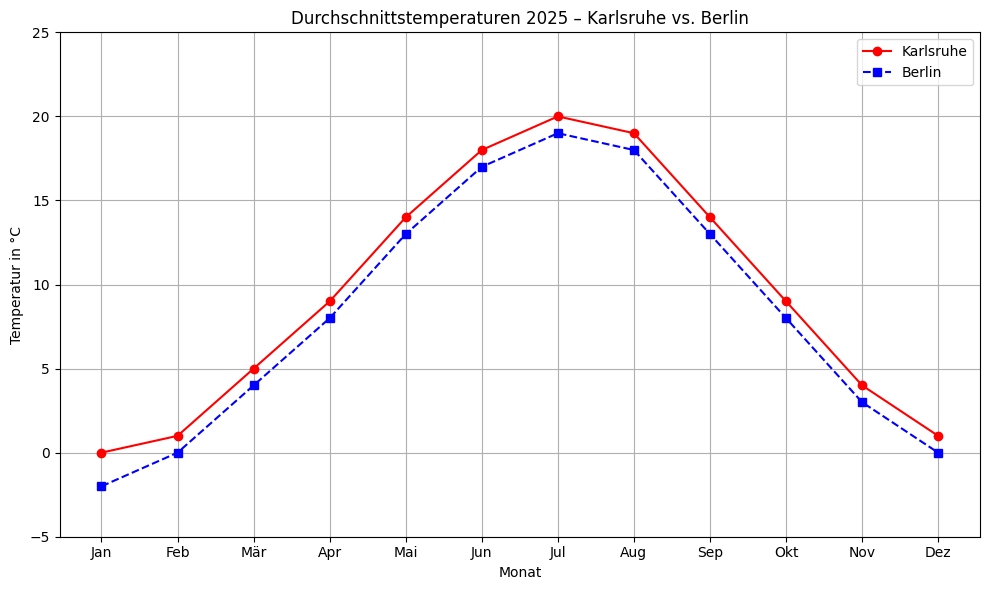

In [3]:
import matplotlib.pyplot as plt

# Daten
monate = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
T_ka = [0, 1, 5, 9, 14, 18, 20, 19, 14, 9, 4, 1]
T_berlin = [-2, 0, 4, 8, 13, 17, 19, 18, 13, 8, 3, 0]

# Plot erstellen
plt.figure(figsize=(10, 6))

plt.plot(monate, T_ka,     marker='o', color='red',   label='Karlsruhe')
plt.plot(monate, T_berlin, marker='s', color='blue',  label='Berlin', linestyle='--')

# Beschriftungen & Co
plt.title('Durchschnittstemperaturen 2025 – Karlsruhe vs. Berlin')
plt.xlabel('Monat')
plt.ylabel('Temperatur in °C')
plt.legend()
plt.grid(True)

# Damits schöner aussieht
plt.ylim(-5, 25)
plt.tight_layout()
plt.show()

## Aufgabe 4

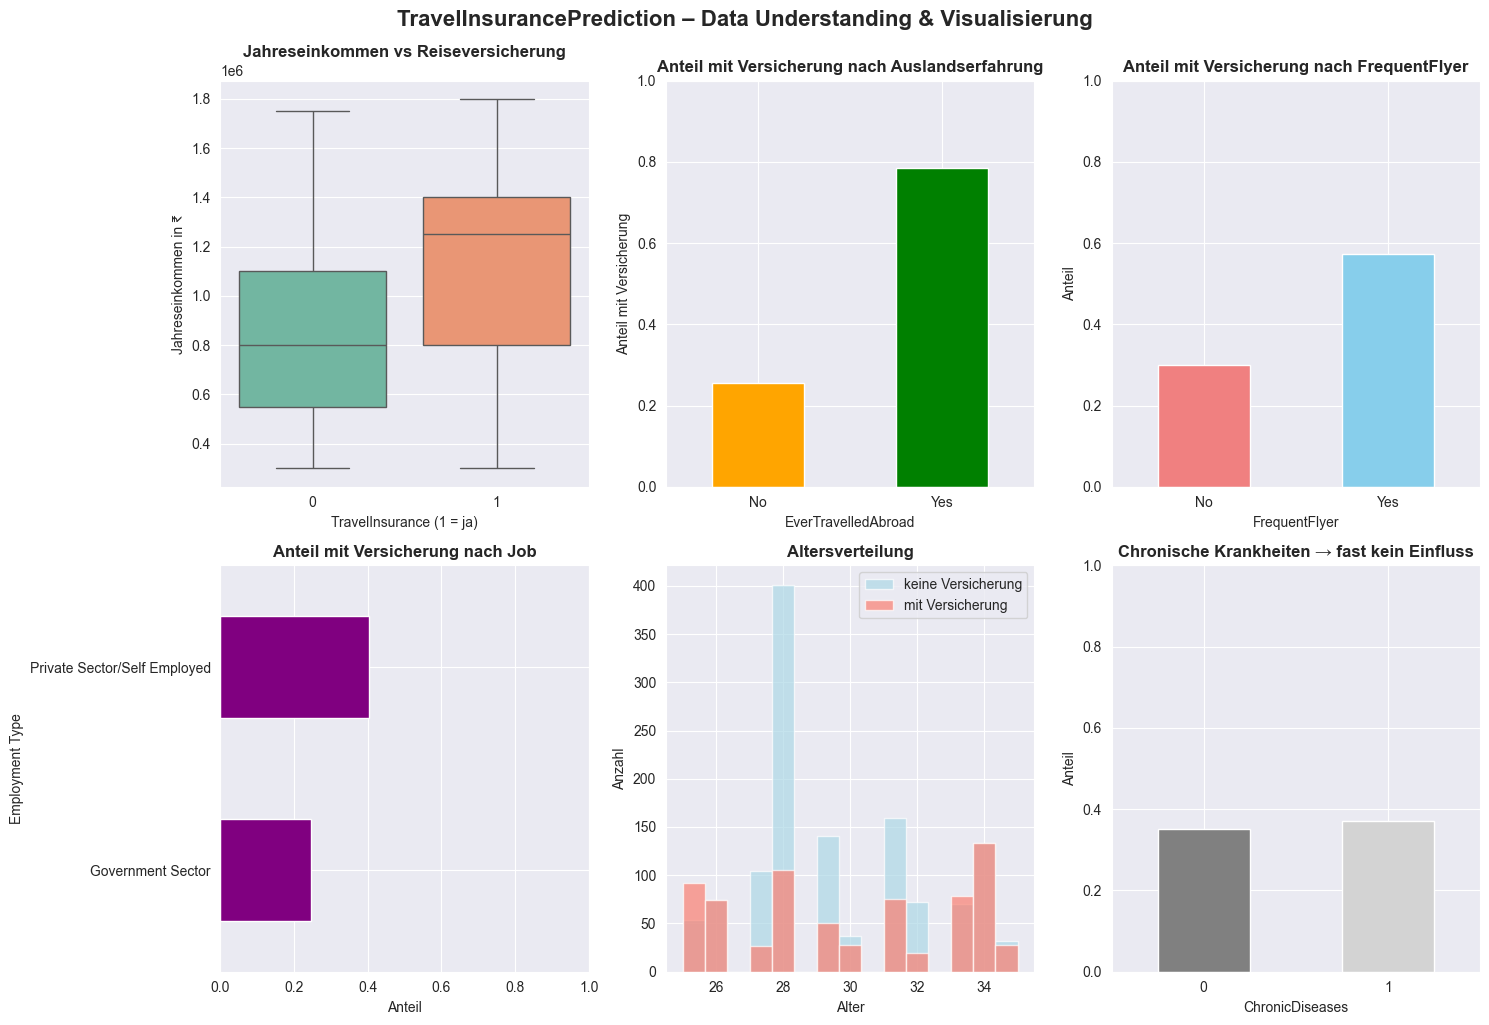

In [5]:
# =============================================================================
# 4. Visualisierung – alles in einer großen 2×3 Übersicht
# =============================================================================
plt.figure(figsize=(15, 10))   # große Figure, damit alles gut lesbar ist

# --------------------------------------------------
# 1. Boxplot: Einkommen vs. Reiseversicherung
# --------------------------------------------------
plt.subplot(2, 3, 1)   # erste Position im 2×3 Grid
sns.boxplot(data=df,
            x="TravelInsurance",          # x-Achse = Zielvariable (0 oder 1)
            y="AnnualIncome",             # y-Achse = Einkommen
            hue="TravelInsurance",        # Farben nach Zielvariable → bessere Trennung
            palette="Set2",               # schönes, kontrastreiches Farbschema
            legend=False)                 # Legende wäre doppelt → ausblenden
plt.title("Jahreseinkommen vs Reiseversicherung", fontweight="bold")
plt.xlabel("TravelInsurance (1 = ja)")     # klar machen, was 0 und 1 bedeutet
plt.ylabel("Jahreseinkommen in ₹")

# --------------------------------------------------
# 2. Auslandserfahrung → Anteil mit Versicherung
# --------------------------------------------------
plt.subplot(2, 3, 2)
# Gruppieren nach EverTravelledAbroad und Mittelwert von TravelInsurance berechnen
# → bei 0/1-Spalte ist mean() genau der Anteil der 1er
(df.groupby("EverTravelledAbroad")["TravelInsurance"]
   .mean()
   .plot(kind="bar",
         color=["orange", "green"],   # No = orange, Yes = grün
         ax=plt.gca()))               # ax=plt.gca() → Plot ins aktuelle Subplot einfügen
plt.title("Anteil mit Versicherung nach Auslandserfahrung", fontweight="bold")
plt.ylabel("Anteil mit Versicherung")
plt.ylim(0, 1)                               # einheitliche Skala für Vergleiche
plt.xticks(rotation=0)

# --------------------------------------------------
# 3. FrequentFlyer → Anteil mit Versicherung
# --------------------------------------------------
plt.subplot(2, 3, 3)
(df.groupby("FrequentFlyer")["TravelInsurance"]
   .mean()
   .plot(kind="bar",
         color=["lightcoral", "skyblue"],
         ax=plt.gca()))
plt.title("Anteil mit Versicherung nach FrequentFlyer", fontweight="bold")
plt.ylabel("Anteil")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# --------------------------------------------------
# 4. Beschäftigungsart (horizontal wegen langen Namen)
# --------------------------------------------------
plt.subplot(2, 3, 4)
(df.groupby("Employment Type")["TravelInsurance"]
   .mean()
   .plot(kind="barh",                  # barh = horizontal bars
         color="purple",               # deine Originalfarbe
         ax=plt.gca()))
plt.title("Anteil mit Versicherung nach Job", fontweight="bold")
plt.xlabel("Anteil")
plt.xlim(0, 1)

# --------------------------------------------------
# 5. Altersverteilung – überlagerte Histogramme
# --------------------------------------------------
plt.subplot(2, 3, 5)
# Personen OHNE Versicherung
df[df["TravelInsurance"] == 0]["Age"].hist(alpha=0.7,
                                           label="keine Versicherung",
                                           bins=15,
                                           color="lightblue")
# Personen MIT Versicherung (wird drübergelegt)
df[df["TravelInsurance"] == 1]["Age"].hist(alpha=0.7,
                                           label="mit Versicherung",
                                           bins=15,
                                           color="salmon")
plt.legend()                                 # sonst weiß niemand, welche Farbe was ist
plt.title("Altersverteilung", fontweight="bold")
plt.xlabel("Alter")
plt.ylabel("Anzahl")

# --------------------------------------------------
# 6. Chronische Krankheiten → fast kein Unterschied
# --------------------------------------------------
plt.subplot(2, 3, 6)
(df.groupby("ChronicDiseases")["TravelInsurance"]
   .mean()
   .plot(kind="bar",
         color=["gray", "lightgray"],   # bewusst langweilig → zeigt Irrelevanz
         ax=plt.gca()))
plt.title("Chronische Krankheiten → fast kein Einfluss", fontweight="bold")
plt.ylabel("Anteil")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# --------------------------------------------------
# Finale Optik
# --------------------------------------------------
plt.tight_layout()                           # verhindert Überlappungen
plt.suptitle("TravelInsurancePrediction – Data Understanding & Visualisierung",
             fontsize=16, fontweight="bold", y=1.02)   # Gesamttitel
plt.show()

## b) - Erkenntnisse

Ähnliche Erkenntnisse wie oben genannt.